In [1]:
from __future__ import print_function
from itertools import groupby
from operator import itemgetter
import networkx as nx
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
import matplotlib.pyplot as plt
import sys,  writeFact, os, pandas as pd, numpy as np, itertools
import networkx as nx
import matplotlib.pyplot as plt
import writeFact

# df border html code

In [1]:
# %%HTML
# <style type="text/css">
# table.dataframe td, table.dataframe th {
#     border: 1px  black solid !important;
#   color: black !important;
# }
# </style>

# tree function & dependencies

# main calls these functions

============ 9
/home/kishori/a/tmp_anu_dir/tmp/GeoE01_tmp/H_sentence :  mOsama Ora jalavAyu ke wawva samAna hEM arWAwa wApamAna, vAyumaMdalIya xabAva, havA, ArxrawA Ora varRaNa.
PID        1    2         3   4      5       6    7       8         9   \
WORDS  mOsama  Ora  jalavAyu  ke  wawva  samAna  hEM  arWAwa  wApamAna   

PID               10      11    12       13   14       15  
WORDS  vAyumaMdalIya  xabAva  havA  ArxrawA  Ora  varRaNa  
Internal nodes & root node:  [0, 1, 3, 5, 6, 9, 11, 15]
End nodes( 8 ) : [2, 4, 7, 8, 10, 12, 13, 14]


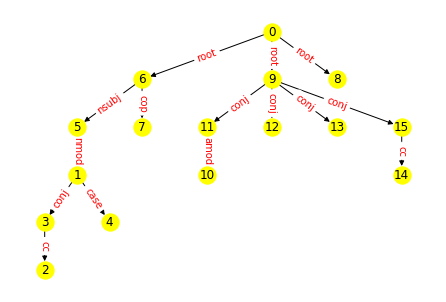

In [2]:
from __future__ import print_function
from itertools import groupby
import tree
import os, pandas as pd
import AnuLibrary, writeFact, tree
from operator import itemgetter
import networkx as nx
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
import matplotlib.pyplot as plt
import sys,  writeFact, os

class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'


#     print("End nodes(",len(end_nodes),") :",end_nodes_list)    


        

for i in range(9,10):
    alignment_path = '.'
    tmp_path=os.getenv('HOME_anu_tmp')+'/tmp/'
#     folder_name = tmp_path + sys.argv[1] + '_tmp'
    folder_name ='/home/kishori/a/tmp_anu_dir/tmp/GeoE01_tmp'
#     folder_name ='/home/kishori/a/tmp_anu_dir/tmp/cl_english_100_detok_tmp'
    sent_number = str(i)
    rawFile =  folder_name +'/2.'+sent_number+'/H_sentence'  #change_in_eng
    which_lang= rawFile.split('/')[-1].split('_')[0]
    parse = folder_name +'/2.'+sent_number+'/hindi_dep_parser_original.dat' #change_in_eng
    tmpSentPath = folder_name+ '/2.'+sent_number+'/'
    print("============",sent_number)
    
    with open(alignment_path+"/vibhakti","r") as f:
        vibhaktis = f.read().splitlines()
        
    [wid_word_list,punctlist,wid_word_dict]=writeFact.createH_wid_word_and_PunctFact(rawFile)
    item2WriteInFacts, def_lwg_item, all_vib_ids = writeFact.lwg_of_postprocessors(wid_word_list,vibhaktis)  
    relation_df = AnuLibrary.create_hindi_dataframe(parse)  
    
    [wid_pid,p_w, wid_pos_list, wid_rel_list]=writeFact.createWID_PID(wid_word_list,relation_df['PID'].tolist(),relation_df['WORD'].tolist(),relation_df['POS'].tolist(), relation_df['RELATION'].tolist())
    
    
    writeFact.add(wid_pid,"H_wid-pid",tmpSentPath+"/H_wid-pid")
    writeFact.addLists([relation_df['PID'].tolist(),relation_df['WORD'].tolist()],"H_pid-word",tmpSentPath+"/H_pid-wid.dat")
    writeFact.addLists([relation_df['PID'].tolist(),relation_df['WORD'].tolist(),relation_df['POS'].tolist(),relation_df['RELATION'].tolist(),relation_df['PIDWITH'].tolist()],"H_cid-child-pos-relation-hid",tmpSentPath+"/H_conll_facts.dat")


    relation_df = writeFact.convertPIDsToWIDs(relation_df)
    
    PID = relation_df['PID'].tolist()
    POS = relation_df['POS'].tolist()
    WORD = relation_df['WORD'].tolist()
    PIDWITH = relation_df['PIDWITH'].tolist()
    RELATION = relation_df['RELATION'].tolist()
    
    new_wid_word_dict = tree.extractNew_wid_word_dictionary(relation_df)
    head_word_list = [new_wid_word_dict[i] for i in PIDWITH]
    
    
    writeFact.addLists([PID,WORD,POS,RELATION,PIDWITH, head_word_list],"H_cid-child-pos-relation-hid-head",tmpSentPath+"/H_parse.dat")
    
    
    cid_hid = writeFact.extractUnlabelledDependency(relation_df)
#         tree(relation_df, wid_word_list, cid_hid, wid_pos_list, wid_rel_list, which_language, tmpSentPath, rawFile)
    
    
    filecontent = open(rawFile,"r").read()
    filename = rawFile.split('/')[-1]
    print (color.BOLD + folder_name+"/" + filename,": ", filecontent, end='' + color.END)

    tree.show_parse_information(relation_df)

    hid_cid = tree.reverse_tuple_list(cid_hid)
    tree.draw_tree(relation_df, hid_cid, which_lang, tmpSentPath)
#     !xdg-open H_tree.png 

#     verb = extract_id_of_i_value_from_j_column_list("VERB",POS)
#     all_aux = find_single_AUX(PID,POS)
  


In [3]:
import tree

In [ ]:
filename= 'H'
    
if (filename[0]=='H'):
    for i in range(5,6):
        sent_number = str(i)
        rawFile =  folder_name +'/2.'+sent_number+'/H_sentence'
        filename = rawFile.split("/")[-1]
        tmpSentPath = folder_name+ '/2.'+sent_number+'/' 
        parse = folder_name +'/2.'+sent_number+'/hindi_dep_parser_original.dat'
        [wid_word_list,punctlist,wid_word_dict]=writeFact.createH_wid_word_and_PunctFact(rawFile)
        try:
            create_hindi_facts(parse, rawFile, tmpSentPath)
        except:
            print("error in ", rawFile )

# demo_codes


In [1]:
from __future__ import print_function
from itertools import groupby
import tree
import os, pandas as pd
import AnuLibrary, writeFact, tree
from operator import itemgetter
import networkx as nx
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
import matplotlib.pyplot as plt
import sys,  writeFact, os

path = '/home/kishori/rule1E_tmp/2.1/'
which_lang = 'H'
relation_df = AnuLibrary.create_dataframe(path + 'hindi_dep_parser_original.dat')  

relation_df
# n = df.shape[0]

cid_hid = writeFact.extractUnlabelledDependency(relation_df)
cid_hid
hid_cid = tree.reverse_tuple_list(cid_hid)
hid_cid
tree.draw_tree(relation_df, hid_cid, which_lang, path)

ValueError: Program dot not found in path.